In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
import sklearn.datasets
from pprint import pprint
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
import exceptions

In [2]:
def not_empty(s):
    return s != ''

In [5]:
warnings.filterwarnings(action='ignore')
np.set_printoptions(suppress=True)
file_data = pd.read_csv('../dataset/housing.data', header=None)
# a = np.array([float(s) for s in str if s != ''])
data = np.empty((len(file_data), 14))
for i, d in enumerate(file_data.values):
    d = map(float, filter(not_empty, d[0].split(' ')))
    data[i] = d
x, y = np.split(data, (13,), axis=1)
# data = sklearn.datasets.load_boston()
# x = np.array(data.data)
# y = np.array(data.target)
print u'样本个数：%d, 特征个数：%d' % x.shape
print y.shape
y = y.ravel()

样本个数：506, 特征个数：13
(506, 1)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)
model = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=True)),
    ('linear', ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.99, 1], alphas=np.logspace(-3, 2, 5),
                            fit_intercept=False, max_iter=1e3, cv=3))
])
print u'开始建模...'
model.fit(x_train, y_train)
linear = model.get_params('linear')['linear']
print u'超参数：', linear.alpha_
print u'L1 ratio：', linear.l1_ratio_
# print u'系数：', linear.coef_.ravel()

order = y_test.argsort(axis=0)
y_test = y_test[order]
x_test = x_test[order, :]
y_pred = model.predict(x_test)
r2 = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print 'R2:', r2
print u'均方误差：', mse

开始建模...
超参数： 0.0177827941004
L1 ratio： 0.99
R2: 0.806333520611
均方误差： 16.1257365581


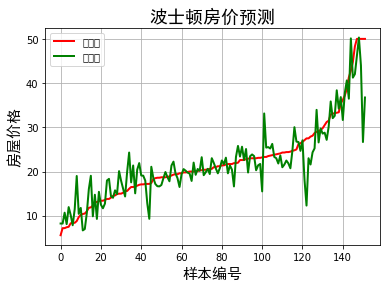

In [11]:
t = np.arange(len(y_pred))
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', lw=2, label=u'真实值')
plt.plot(t, y_pred, 'g-', lw=2, label=u'估计值')
plt.legend(loc='best')
plt.title(u'波士顿房价预测', fontsize=18, fontproperties=fontproperties)
plt.xlabel(u'样本编号', fontsize=15, fontproperties=fontproperties)
plt.ylabel(u'房屋价格', fontsize=15, fontproperties=fontproperties)
plt.grid()
plt.show()